In [169]:
!pip freeze > requirements.txt

In [170]:
%pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [171]:
from matplotlib import pyplot as plt

import numpy as np

In [180]:
COLORS = ["blue", "green", "red", "orange", "yellow", "purple", "pink", "magenta"]
def plotar_vetor(*vetores: *tuple[int, int], title = ""):
    plt.figure()
    i = 0
    for x, y in vetores:
        plt.arrow(0, 0, x, y, head_width=0.1, head_length=0.2, fc=COLORS[i], ec=COLORS[i], length_includes_head=True)
        i += 1
    plt.xlim(-1.5, 2)
    plt.ylim(-2, 1.5)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [172]:
def plotar(A, grid_range=5, step=1, e1= np.array([1, 0]), e2= np.array([0, 1]), title=""): 
    fig, ax = plt.subplots(figsize=(8, 8))
    xs = np.arange(-grid_range, grid_range + step, step)
    ys = np.arange(-grid_range, grid_range + step, step)

    for y in ys:
        p = np.vstack([np.linspace(-grid_range, grid_range, 200), np.full(200, y)])
        pt = A @ p
        ax.plot(pt[0], pt[1], color="gray", linestyle="-", linewidth=1)

    for x in xs:
        p = np.vstack([np.full(200, x), np.linspace(-grid_range, grid_range, 200)])
        pt = A @ p
        ax.plot(pt[0], pt[1], color="gray", linestyle="-", linewidth=1)

    # Vetores base
    Ae1 = A @ e1
    Ae2 = A @ e2

    ax.arrow(0, 0, Ae1[0], Ae1[1], head_width=0.2, color="green")
    ax.arrow(0, 0, Ae2[0], Ae2[1], head_width=0.2, color="blue")

    ax.set_aspect("equal")
    ax.set_xlim(-grid_range, grid_range)
    ax.set_ylim(-grid_range, grid_range)

    ax.set_title(f"Transformação linear da {title}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    plt.show()

1. A aplicação e a demonstração visual da r**otação horária de 90°,** seguida de **shear (cisalhamento) em x**, conforme o procedimento mostrado no slide 60 ao slide 68 da apresentação “**Matrix multiplication as composition”**. 


#### Normal

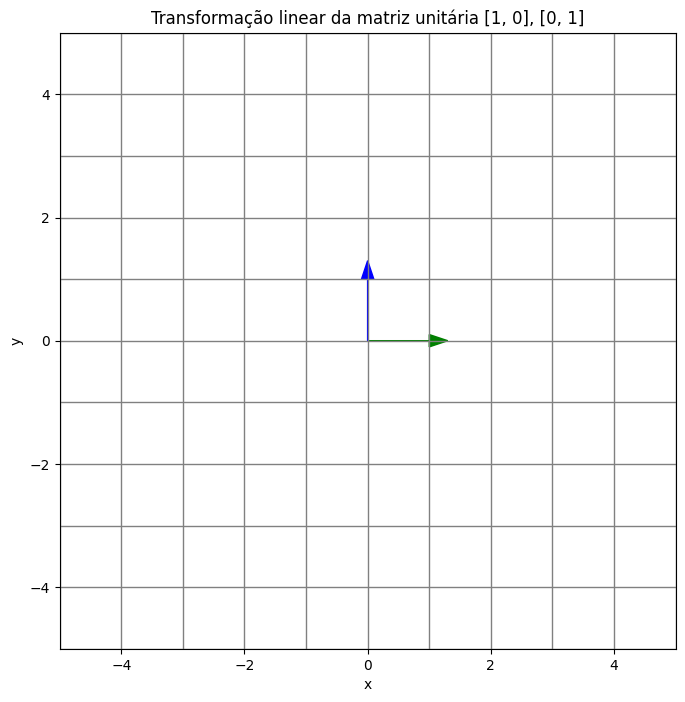

In [173]:
plotar([[1, 0], [0, 1]], e1=np.array([1,0]), e2=np.array([0,1]), title="matriz unitária [1, 0], [0, 1]")

#### Rotação

A matriz rotação é $$M = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$$

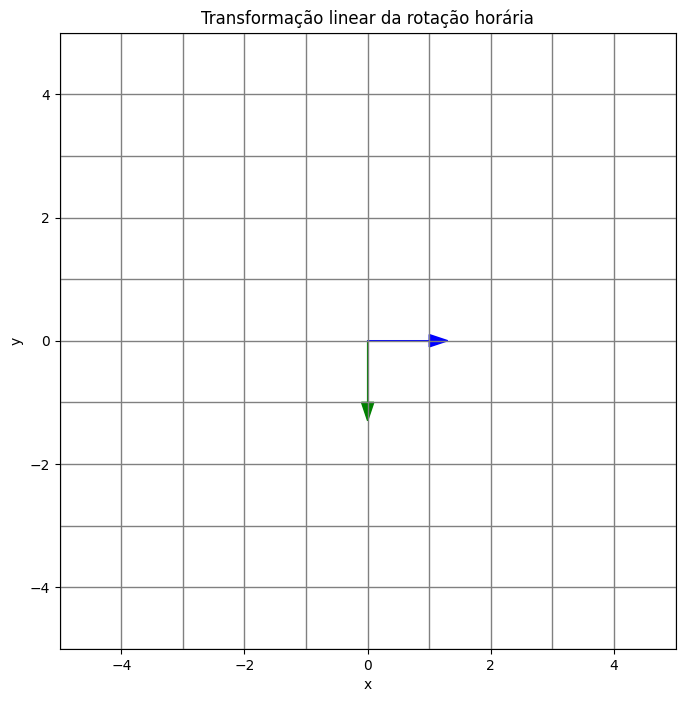

In [174]:
plotar([[0, 1], [-1, 0]], title="rotação horária")

#### Cisalhamento

A matriz do cisalhamento é $$M = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$$

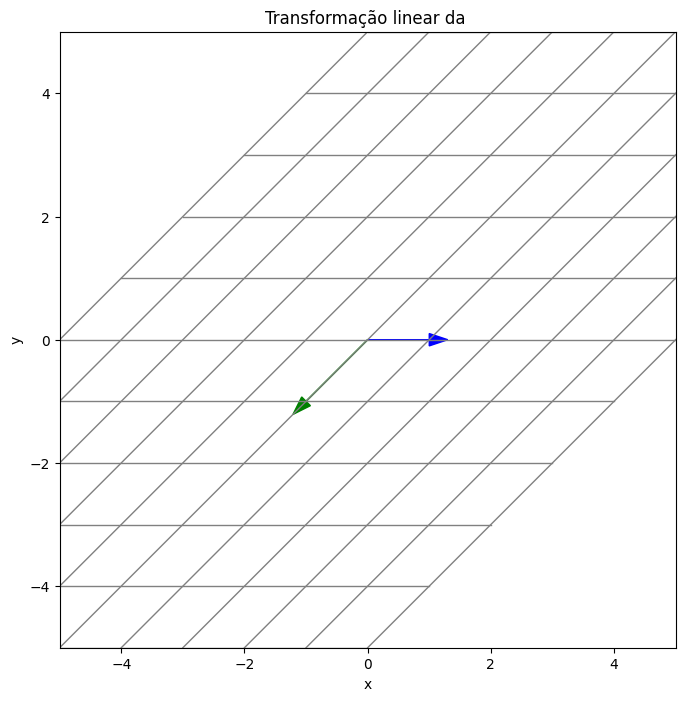

In [175]:
plotar([[1, 1], [0, 1]], e1=np.array([0, -1]), e2=np.array([1, 0]))

2. Mostre visualmente e explique o valor do determinante depois das transformações


O determinate representa numericamette a deformação da área

In [176]:
def plot_determinante(v1, v2):
    """
    Plota dois vetores v1 e v2 a partir da origem
    e o paralelogramo formado por eles, cuja área é |det([v1 v2])|.
    """
    v1 = np.array(v1)
    v2 = np.array(v2)

    # Calcula o determinante
    det = np.linalg.det(np.column_stack((v1, v2)))
    area = abs(det)

    # Pontos do paralelogramo
    p0 = np.array([0, 0])
    p1 = v1
    p2 = v2
    p3 = v1 + v2

    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_aspect("equal", "box")

    # Plota vetores
    ax.arrow(0, 0, v1[0], v1[1], head_width=0.08, color="green", length_includes_head=True)
    ax.arrow(0, 0, v2[0], v2[1], head_width=0.08, color="blue", length_includes_head=True)

    # Preencher o paralelogramo
    polygon = np.array([p0, p1, p3, p2])
    ax.fill(polygon[:,0], polygon[:,1], color="orange", alpha=0.4, label=f"Área = |det| = {area:.2f}")

    # Eixos e limites
    max_val = max(np.linalg.norm(v1), np.linalg.norm(v2)) + 1
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)

    ax.axhline(0, color="black", linewidth=1)
    ax.axvline(0, color="black", linewidth=1)

    ax.set_title("Representação gráfica do determinante")
    ax.legend()
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    plt.show()

#### Determinante sem transformação linear

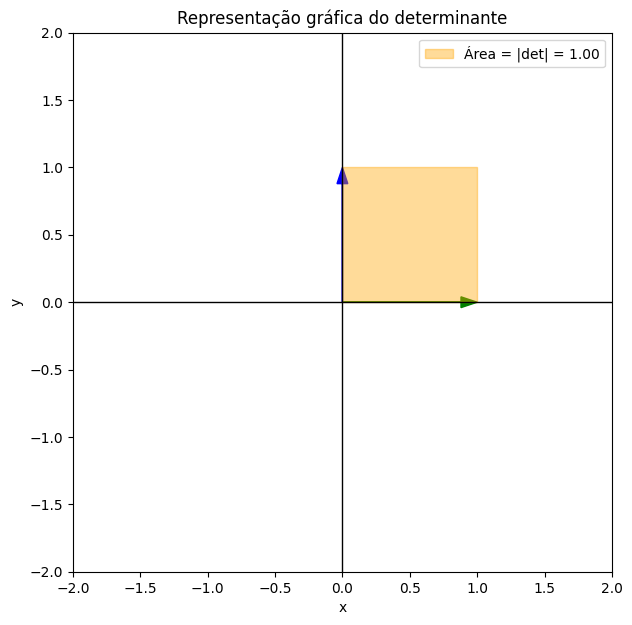

In [177]:
plot_determinante([1, 0], [0, 1])

#### Determinante da rotação

Percebe-se que a área não foi alterada, apenas a posição dos vetores

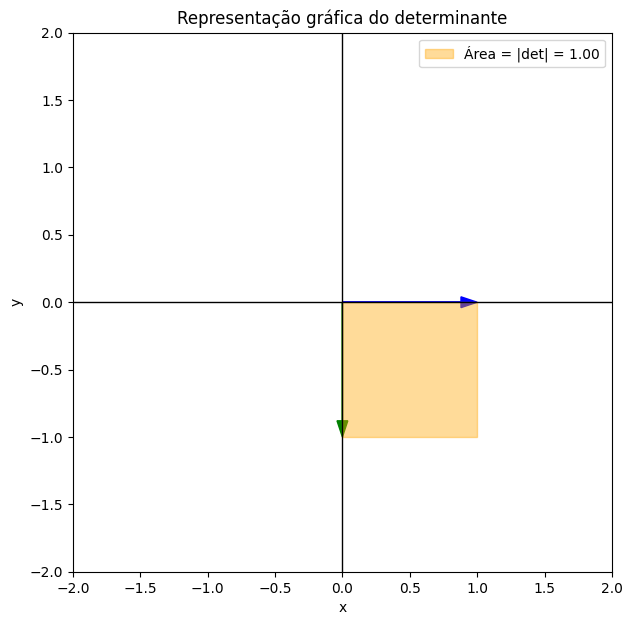

In [178]:
plot_determinante([0, -1], [1, 0])

#### Determinante rotação + cisalhamento

Mais uma vez, a área não mudou, apenas a posição dos vetores que foi alterada

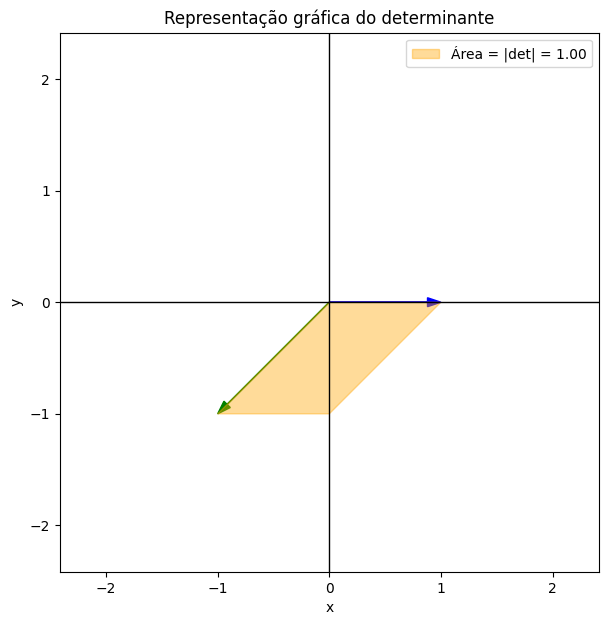

In [179]:
plot_determinante([-1, -1], [1, 0])

3. Para o seu caso, faça o mesmo procedimento mostrado no slide 70 até o slide 92 da apresentação “**Matrix multiplication as composition"**.


A Multiplicação ($S \times R$)$$\underbrace{\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}}_{S} \times \underbrace{\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}}_{R} = \begin{bmatrix} ? & ? \\ ? & ? \end{bmatrix}$$

$$\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \times \begin{bmatrix} 0 \\ -1 \end{bmatrix} = 0 \begin{bmatrix} 1 \\ 0 \end{bmatrix} - 1 \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} -1 \\ -1\end{bmatrix}$$

$$\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \times \begin{bmatrix} 1 \\ 0 \end{bmatrix} = 1 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 0 \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

A Matriz Combinada Final é:$$M_{\text{final}} = \begin{bmatrix} -1 & 1 \\ -1 & 0 \end{bmatrix}$$

4. Faça o mesmo acima, mas invertendo a ordem das transformações. 


Se invertermos a ordem da multiplicação
A Multiplicação ($R \times S$)$$\underbrace{\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}}_{R} \times \underbrace{\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}}_{S} = \begin{bmatrix} ? & ? \\ ? & ? \end{bmatrix}$$

$$\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \times \begin{bmatrix} 1  \\ 0 \end{bmatrix} = 1 \begin{bmatrix} 0 \\ -1 \end{bmatrix} + 0 \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ -1\end{bmatrix}$$

$$\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \times \begin{bmatrix} 1  \\ 1 \end{bmatrix} = 1 \begin{bmatrix} 0 \\ -1 \end{bmatrix} + 1 \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ -1\end{bmatrix}$$

A Matriz Combinada Final é:$$M_{\text{final}} = \begin{bmatrix} 0 & -1 \\ 1 & -1 \end{bmatrix}$$

5. Faça uma transformação linear em um vetor x de duas dimensões para obter um vetor y orientado a 90° em relação a x. Calcule o produto escalar entre os dois vetores. Interprete o resultado.

Dado que a transformação linear de um vetor x para obter outro vetor orientado a 90° em ralação ao x é a rotação de 90°\
Considere x = $\begin{bmatrix} 2 \\ 1 \end{bmatrix}$ e a matriz tranformação M = $\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$
\
\
Assim, y = $\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \times \begin{bmatrix} 2 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ -2 \end{bmatrix} $

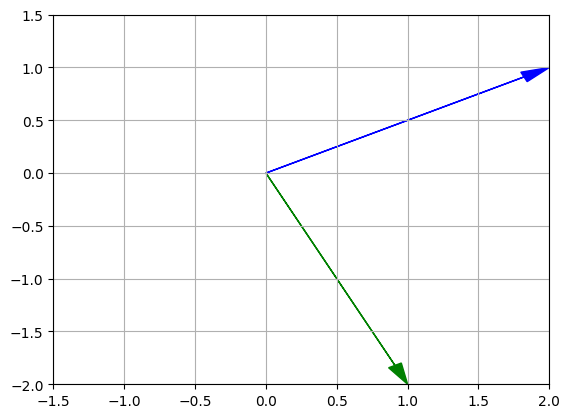

In [183]:
plotar_vetor([2, 1], [1, -2])

O produto escalar: $\begin{bmatrix} 2 \\ 1 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ -2 \end{bmatrix} = (2 \times 1) + (1 \times -2) = 2  \times -2 = 0 $\
Isso significa que a similaridade entre os dois vetores é 0